# House Prices: Advanced Regression Techniques - Kaggle
* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

# Modules

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# load data

In [417]:
import os
next(os.walk("./data"))

('./data',
 ['.ipynb_checkpoints'],
 ['comprehensive-data-exploration-with-python.ipynb',
  'data_description.txt',
  'house-prices-advanced-regression-techniques.zip',
  'sample_submission.csv',
  'test.csv',
  'train.csv'])

In [418]:
df_train = pd.read_csv('./data/train.csv')

In [419]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [420]:
df_train.columns.nunique()

81

In [421]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 시각화

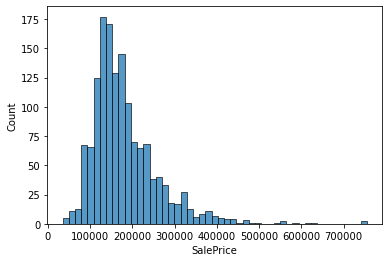

In [422]:
sns.histplot(df_train.SalePrice)

In [423]:
print(f" Skewness : {df_train.SalePrice.skew():.7f}")
print(f" Kurtosis : {df_train.SalePrice.kurt():.7f}")

 Skewness : 1.8828758
 Kurtosis : 6.5362819


skewness : https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84  
kurtosis : https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84

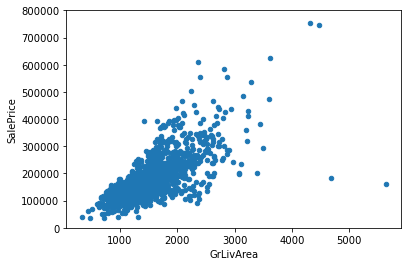

In [424]:
df_train.plot.scatter(x = "GrLivArea", y="SalePrice", ylim = (0,800000))

면적이 커질수록 가격이 상승하는 경향이 있지만 아웃라이어 값이 존재

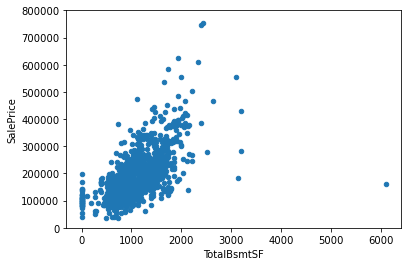

In [425]:
df_train.plot.scatter(x = "TotalBsmtSF", y="SalePrice", ylim = (0,800000))

(-0.5, 9.5, 0.0, 800000.0)

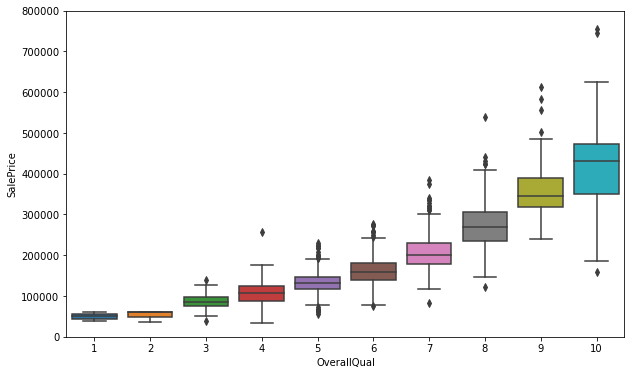

In [426]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df_train, x = "OverallQual", y = "SalePrice", ax = ax)
ax.axis(ymin = 0, ymax = 800000)

인테리어 마감이 잘 되어 있을수록 가격이 높은 편

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

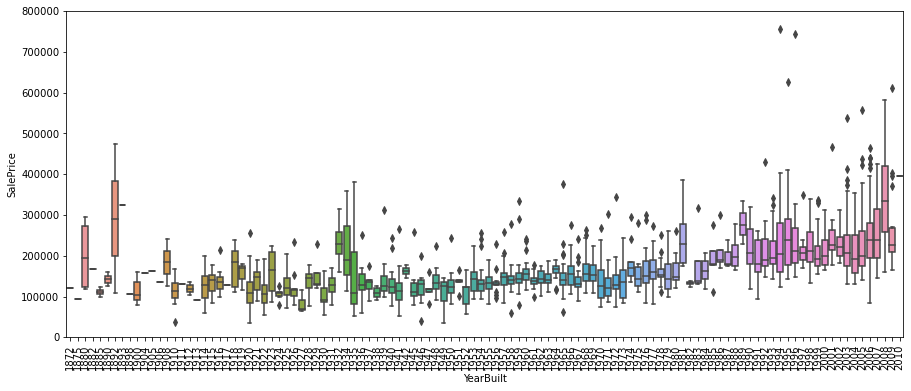

In [427]:
fig, ax = plt.subplots(figsize = (15,6))
sns.boxplot(data = df_train, x = "YearBuilt", y = "SalePrice", ax = ax)
plt.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

# 상관관계(heatmap style)

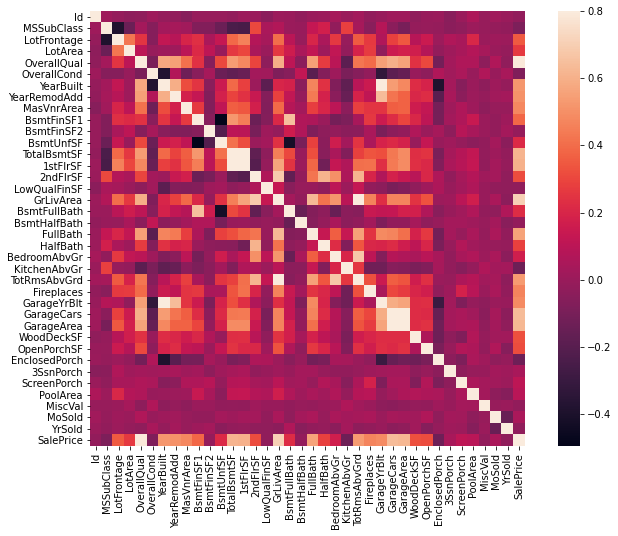

In [428]:
fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(data = df_train.corr(),square = True,vmax = 0.8)

In [429]:
# 상관계수 상위 10개 선택
df_train.corr().nlargest(10,"SalePrice").SalePrice

#아래와 같이도 할 수 있으나 과정을 줄일 수 있어서 코드가 콤팩트해짐

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [430]:
df_train.corr().sort_values("SalePrice",ascending = False).SalePrice.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [431]:
# 상위 10개 변수 값 저장
cols = df_train.corr().nlargest(10,"SalePrice").SalePrice.index

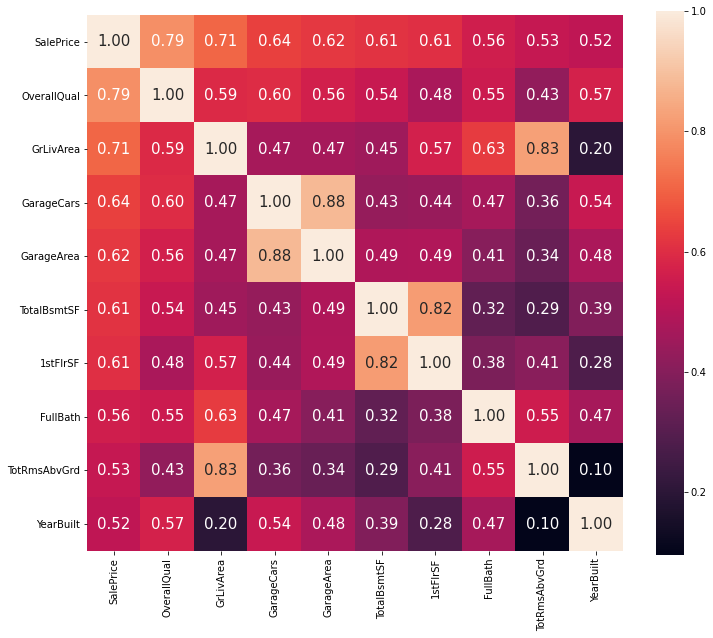

In [432]:
#heatmap 다시 그리기
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(df_train[cols].corr(),square = True,
            annot = True, fmt = '.2f', annot_kws={'size' : 15})

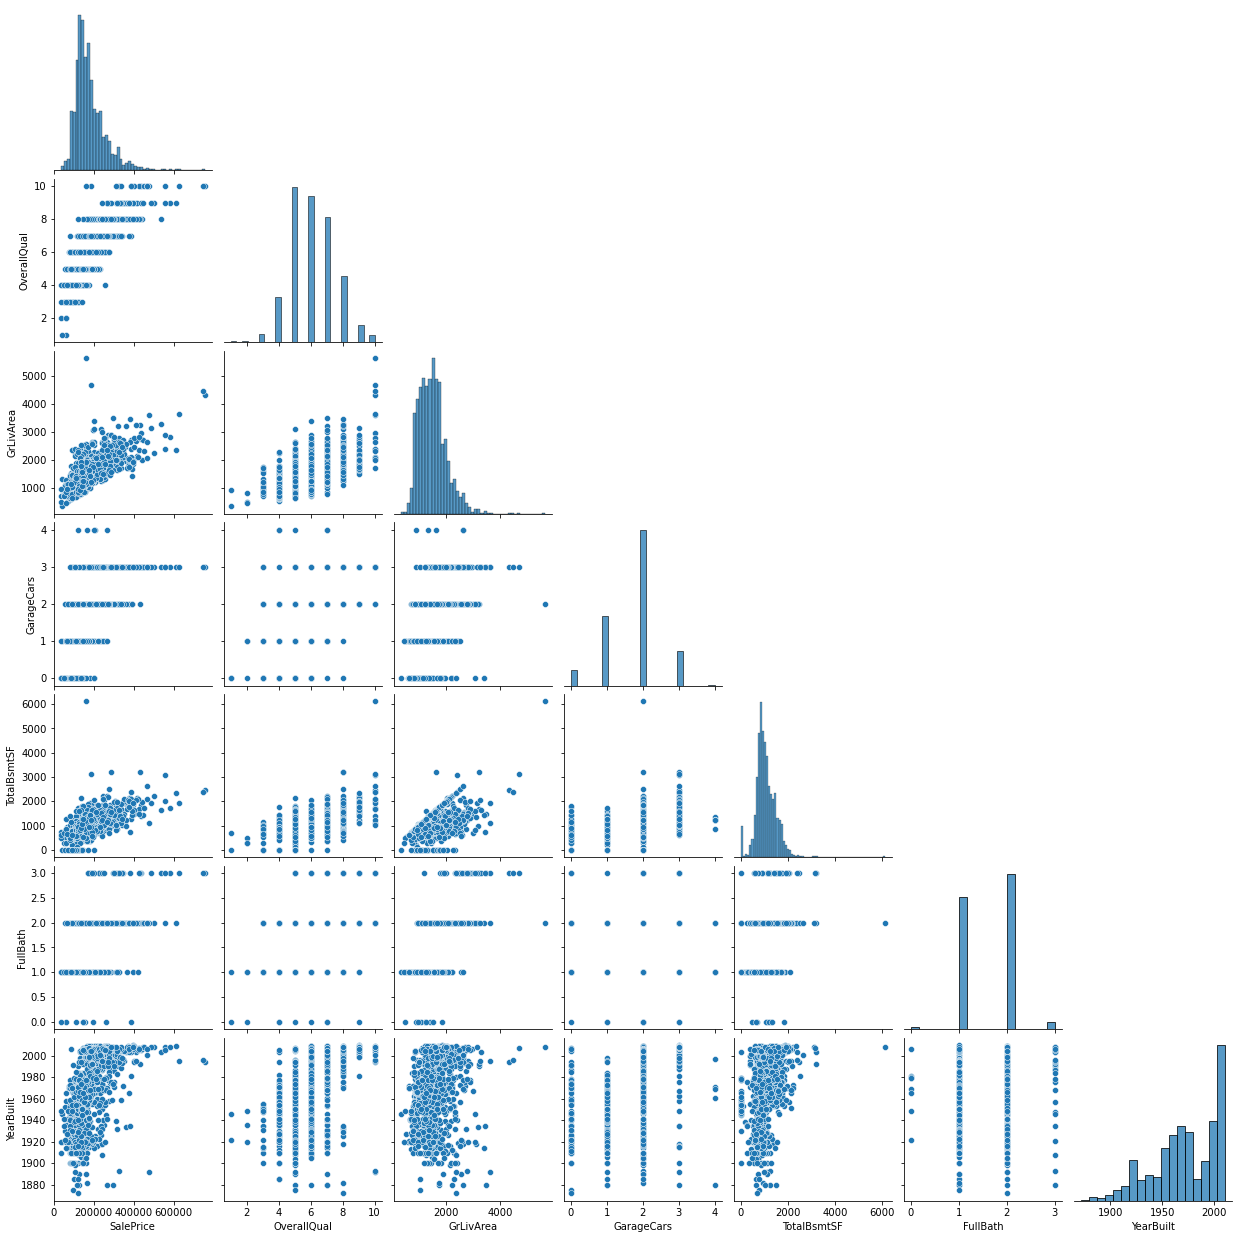

In [433]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],corner = True)

# 결측치 처리

In [434]:
missings = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missings, percent],axis = 1,keys = ["total","percent"])
missing_data


,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


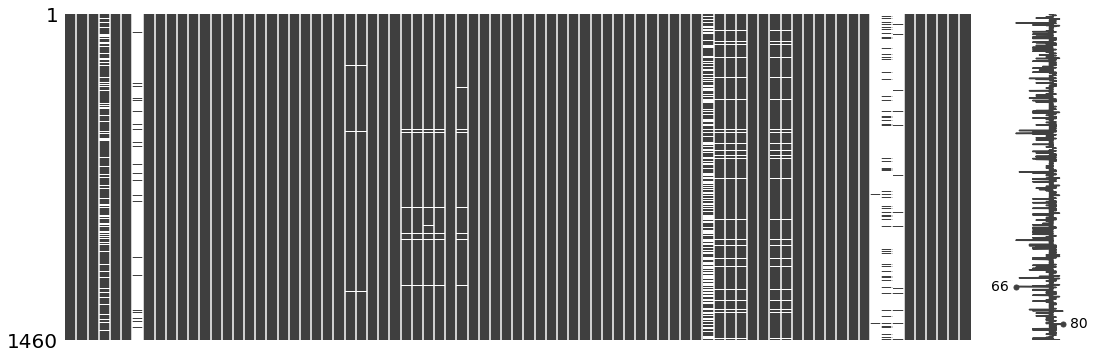

In [435]:
import missingno as msno
msno.matrix(df_train, figsize = (18,6))

In [436]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# 이상치 처리

In [437]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
# StandardScaler().fit_transform(np.array(df_train['SalePrice']).reshape(-1,1))
# fit_transform()에는 array data가 필요하며, 상기 두 가지 방법으로 array를 만들 수 있음
# np.newaxis는 새로운 차원을 생성하는 numpy패키지의 기능이고
# reshape도 데이터셋을 새로운 배열 형태로 변환하는 num패키지의 기능
# reshape의 -1은 차원을 따로 정하지 않는다는 의미, 즉 열을 1차원으로 했기에 나머지 데이터에 맞게 행을 생성
# -1을 행에도 기입 가능

low_range =  saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range =  saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
# np.sort(saleprice_scaled[:,0])=> 똑같은 값에 따라 sorting을 해주지만 차원이 사라지게 되므로, 다시 reshape or newaxis로 차원을 늘려줘야 상기 코드와 결과가 같음

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [438]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [439]:
#데이터 다시 보기

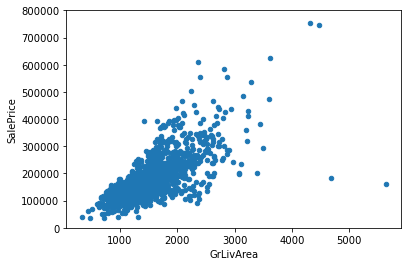

In [440]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 'SalePrice' 에서 0과 가장 먼 7값이 2개가 있었는데, 그래프 상으로 우측 상단의 두개의 점으로 판단됨
- 두 점이 다른 점과 마찬가지로 선형특성을 따르는 것으로 보아 유지
- 우측 하단 두 점은 삭제

In [441]:
delete_rows = df_train.GrLivArea.sort_values().tail(2).index
df_train = df_train.drop(delete_rows,axis = 0)

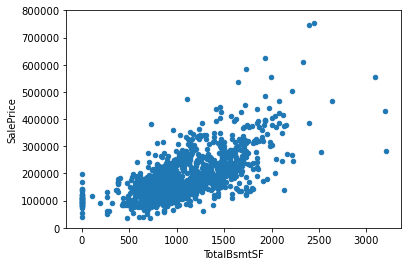

In [415]:
df_train.plot.scatter(x="TotalBsmtSF", y='SalePrice', ylim=(0,800000));